In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [13]:
df = pd.read_csv("../data/adult.csv")

df_cleaned = df.replace("?", pd.NA).dropna()

incorrect_salary_rows = df_cleaned[~df_cleaned["salary"].str.isdigit()]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [15]:
print(df["sex"].value_counts())

sex
Male      21790
Female    10771
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [18]:
df_cleaned[df_cleaned["sex"] == "Male"]["age"].mean()

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [22]:
poland_count = df_cleaned[df_cleaned["native-country"] == "Poland"].shape[0]
total_count = df_cleaned.shape[0]
round((poland_count / total_count) * 100, 2)

0.18

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [26]:
mean_more50k = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].mean()
std_more50k = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].std()
mean_less50k = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].mean()
std_less50k = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].std()

36.78373786407767

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [32]:
df_cleaned[
    (df_cleaned["education"] != "Bachelors")
    | (df_cleaned["education"] != "Prof-school")
    | (df_cleaned["education"] != "Assoc-acdm")
    | (df_cleaned["education"] != "Assoc-voc")
    | (df_cleaned["education"] != "Masters")
    | (df_cleaned["education"] != "Doctorate")
][df_cleaned["salary K$"] > 50]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
11,11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,32538,38,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K,248
32545,32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122
32554,32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,103
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [34]:
df_cleaned.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [38]:
married_men_salaries = df[
    (df["marital-status"].str.startswith("Married")) & (df["sex"] == "Male")
]["salary K$"].mean()
non_married_men_salaries = df[
    ~df["marital-status"].str.startswith("Married") & (df["sex"] == "Male")
]["salary K$"].mean()

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [40]:
df[df["hours-per-week"] == df["hours-per-week"].max()]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
935,935,37,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99,United-States,>50K,274
1172,1172,25,Private,Masters,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,99,United-States,>50K,207
1887,1887,55,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,99,United-States,>50K,188
3578,3578,37,Self-emp-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Black,Male,99,United-States,>50K,136
4086,4086,50,?,10th,Married-civ-spouse,?,Husband,White,Male,99,United-States,<=50K,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,30992,40,Self-emp-inc,Masters,Never-married,Other-service,Own-child,White,Male,99,United-States,<=50K,48
31681,31681,43,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99,United-States,>50K,237
31699,31699,43,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,99,United-States,<=50K,40
32469,32469,58,Self-emp-inc,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,99,?,<=50K,29


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

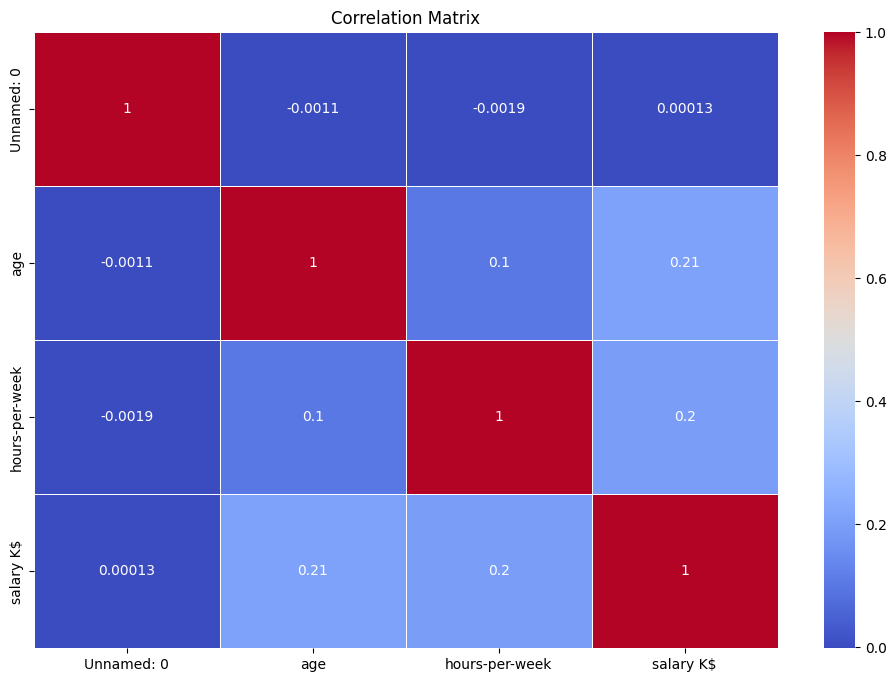

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_cleaned.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()